# 14-04-2023

# Linear regression

In [1]:
#linear regression:  help in value prediction

### problem statement: Build a model which predict sales based on money spent on different platforms
### predictor variable

- sales: dependent variable
- newspaper,radio,tv: independent variable
- dependednt and independent both in numerical

#  types
1) simple linear
2) multiple linear
3) polynomial 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pandas_profiling import ProfileReport

In [3]:
advertising = pd.read_csv(r"D:\Dataset_3ri\advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
profile = ProfileReport(advertising)
profile.to_file(output_file='outliers.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile = ProfileReport(advertising)

In [13]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

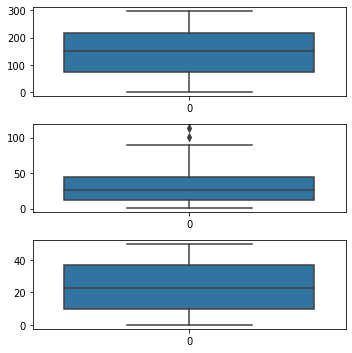

In [14]:
fig,axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(advertising['TV'],ax=axs[0])
plt2 = sns.boxplot(advertising['Newspaper'],ax=axs[1])
plt3 = sns.boxplot(advertising['Radio'],ax=axs[2])
plt.tight_layout()
plt.show()

<AxesSubplot: >

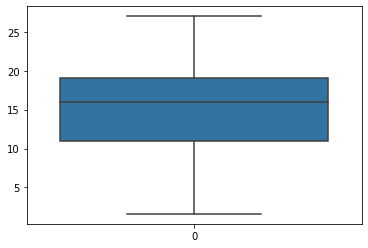

In [15]:
#EDA:
#univariate analysis
sns.boxplot(advertising['Sales'])

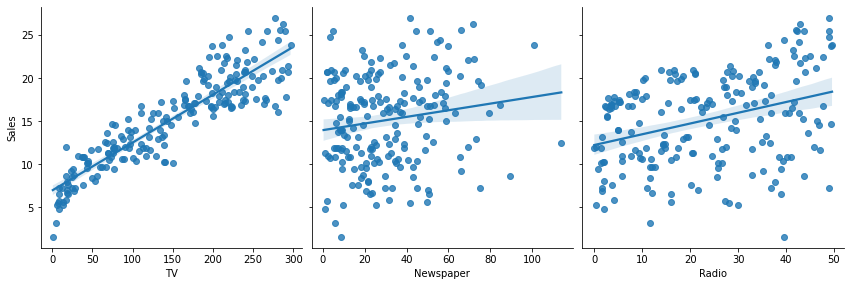

In [16]:
#need to check that how my sales are related with other variables.
sns.pairplot(advertising, x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='reg')
plt.show()

In [17]:
#differnce between data points and line is called as error
#above line: positive error
#below line: negative error

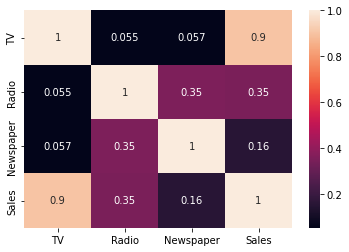

In [18]:
sns.heatmap(advertising.corr(),annot=True)            #annot=heatmap labels
plt.show()
#"YlGnBu"

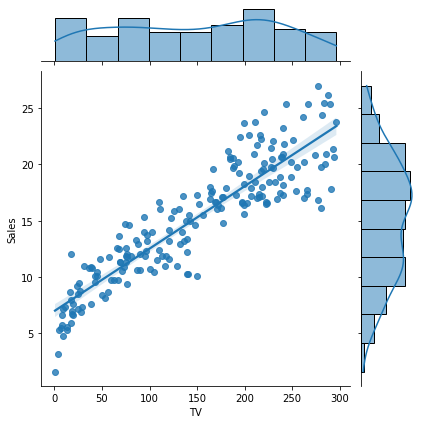

In [19]:
sns.jointplot(x = 'TV', y= 'Sales',data=advertising,kind='reg')

In [20]:
#model building

X=advertising['TV']     #indep.variables/features
y=advertising['Sales']   #dep .variables/features

In [21]:
#     Test       Train
#  x. XTest      XTrain
#  y. ytest      yTrain

In [22]:
from sklearn.model_selection import train_test_split
#we are calling the library to perform train test split and then we can start splitting the data

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

#a total of 4 new variable formed = train_test_split(x,y,train and test data,random_state)
#we can take any values in train or test data to rem. that the train size has to be more compared to Test size
#random state(100,53,42,101,51 etc) : to do the randomization of train and test data


In [24]:
import statsmodels.api as sm

In [25]:
#y=c+mx

In [26]:
X_train_sm=sm.tools.tools.add_constant(X_train)

#model will alwasys be made on independent variable (x) and by using its train data

In [27]:
#using the fit transform for ols to fit the line across L.R dist
lr=sm.OLS(y_train,X_train_sm).fit()

#OLS: ordinary list square

In [28]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        20:04:58   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [30]:
#R-squared: model accuracy

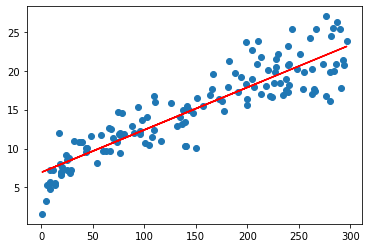

In [31]:
# 
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948683+0.054546*X_train,'r')
plt.show()

In [32]:
lr.predict([[1,180]])

array([16.76691872])